In [ ]:
import random
from numpy import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import time

#getting distinct N points
def N_random_points(N,End):
    ans = []
    for i in range(0,int(N)):
        tempx = random.uniform(0, End)
        tempy = random.uniform(0, End)
        ans.append((tempx,tempy))
    return ans

def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

#S I R count for next day
def SIR_NEXTday(SIR,gridSize,proximity):#p prob of going out x is people infected at day zero
    s=SIR[0]
    inf=SIR[1]
    hr=8
    lstS=[]
    for i in range(hr):
        lstS.append(N_random_points(s,gridSize))
    lstI=[]
    for i in range(hr):
        lstI.append(N_random_points(inf,gridSize))
    PosOfNewlyInfected=[]
    di=0
    for i in range(hr):
        Infected=lstI[i]
        Succeptible=lstS[i]
        for j in Infected:
            x = [k for k in range(len(Succeptible)) if math.sqrt((Succeptible[k][0]-j[0])**2+(Succeptible[k][1]-j[1])**2)<proximity]
            PosOfNewlyInfected=Union(PosOfNewlyInfected,x)
    newInfected = len(PosOfNewlyInfected)
    change = int(0.8*newInfected)
    rem=int(0.2*newInfected)
    newInfected=change
    newSucceptible = s-newInfected
    return newSucceptible,newInfected
def main_simuate_fn(nod=10,nop=1000,perInf=0.05,gs=1000,pd=5,p_out=0.5,r_to_s=0.1):
    a = nop*p_out
    simu_list = []; simu_list.append([a*(1-perInf),a*perInf,0,0])
    ans_list = []; ans_list.append([a*(1-perInf),a*perInf,0,0])
    work_hos = []; work_hos.append([a,0])
    prev = simu_list[-1]
    curr_i = a*perInf; curr_s = a*(1-perInf); curr_r = 0; curr_h = 0
    for day in range(1,nod):
        # print(day,end=" ")
        if(day>=5):
            curr_i -= simu_list[day-5][1]
            curr_h += simu_list[day-5][1]
        if(day>=20):
            curr_s += int(r_to_s*simu_list[day-20][1])
            curr_r += simu_list[day-20][1] - int(r_to_s*simu_list[day-20][1])
            curr_h -= simu_list[day-20][1]
        curr_s,newi = SIR_NEXTday([curr_s,curr_i],gs,pd)
        curr_i += newi
        work_hos.append([curr_s+curr_i+curr_r,curr_h])
        simu_list.append([curr_s,newi,curr_h,curr_r])
        ans_list.append([curr_s,curr_i,curr_h,curr_r])
    return ans_list

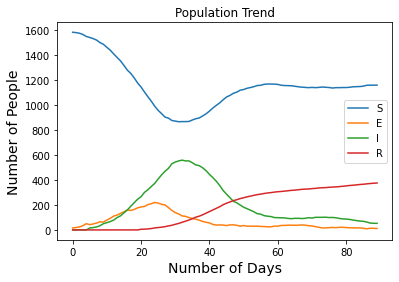

In [ ]:
#plot curve of variation of people
ans=main_simuate_fn(nod=90,nop=2000,perInf=0.01,gs=1500,pd=5,p_out=0.8,r_to_s=0.7)
l1=[]
l2=[]
l3=[]
l4=[]
for i in ans:
  l1.append(i[0])
  l2.append(i[1])
  l3.append(i[2])
  l4.append(i[3])
x = [i for i in range(90)]
plt.plot(x, l1, linestyle='solid', label='S')
plt.plot(x, l2, linestyle='solid', label='E')
plt.plot(x, l3, linestyle='solid', label='I')
plt.plot(x, l4, linestyle='solid', label='R')
plt.xlabel('Number of Days', fontsize = 14)
plt.ylabel('Number of People', fontsize = 14)
plt.title('Population Trend')
plt.legend()
plt.savefig("Population_trend_nod=90,nop=2000,perInf=0.01,gs=1500,pd=5,p_out=0.8,r_to_s=0.7.png" ,dpi =300)
plt.show()

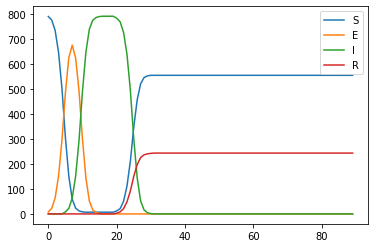

In [ ]:
#plot curve of variation of people
ans=main_simuate_fn(nod=90,nop=1000,perInf=0.01,gs=500,pd=5,p_out=0.8,r_to_s=0.7)
l1=[]
l2=[]
l3=[]
l4=[]
for i in ans:
  l1.append(i[0])
  l2.append(i[1])
  l3.append(i[2])
  l4.append(i[3])
x = [i for i in range(90)]
plt.plot(x, l1, linestyle='solid', label='S')
plt.plot(x, l2, linestyle='solid', label='E')
plt.plot(x, l3, linestyle='solid', label='I')
plt.plot(x, l4, linestyle='solid', label='R')
plt.legend()
plt.savefig("Population_trend_nod=90,nop=1000,perInf=0.01,gs=500,pd=5,p_out=0.8,r_to_s=0.7.png" ,dpi =300)
plt.show()

In [ ]:
# Getting alpha
def utility_alphaBest(nod,nop,perInf,gs,pd,p, S_s,S_i,S_r,S_h,H_s,H_i):
    everyday =[]
    day_eco =[]
    day_health =[]
    model = main_simuate_fn(nod,nop,perInf,gs,pd,p)
    # curr_s,curr_i,curr_h,curr_r
    prevInf=0
    alpha=[]
    inf=[]
    for ele in model:
        inf.append(ele[1])
        if prevInf==0:
          R=1#1st day R=1
          prevInf=ele[1]
          H_s=R*ele[1]
        else:
          R=(ele[1]-prevInf)/prevInf
          prevInf=ele[1]
          H_s=R*ele[1]
        Numerator=(ele[0]*H_s+ele[2]*H_i)/(ele[0]+ele[2]+ele[1]+ele[3])
        denominoter1=0.2*(ele[0]*S_s+ele[1]*S_s+ele[3]*S_r)/(ele[0]+ele[1]+ele[3]+ele[2])
        denominater2=(ele[0]*H_s+ele[2]*H_i)/(ele[0]+ele[2]+ele[1]+ele[3]) - S_h
        alphaPrs=Numerator/(denominoter1+denominater2)
        alpha.append(alphaPrs)
    # x = [i for i in range(60)]
    # plt.plot(x, inf, linestyle='solid')
    # plt.show()
    return alpha

p= 0.8


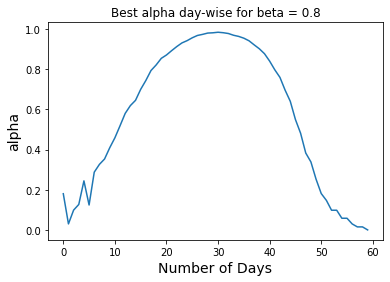

p= 0.9


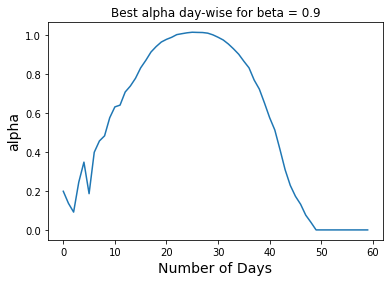

p= 1.0


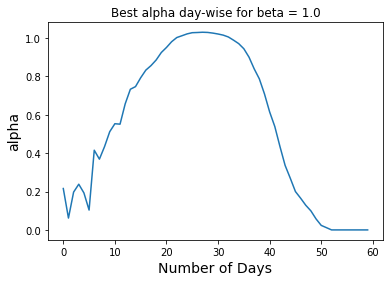

In [ ]:
#plots for alpha
lstAlphas=[]
for i in range(8,11):
  print("p=",i/10)
  alphas=utility_alphaBest(60, 1000, 0.01, 1000, 5, i/10, 360, 360, 400, 36, 180, 500)
  lstAlphas.append(alphas)
  x = [i for i in range(60)]
  plt.plot(x, alphas, linestyle='solid')
  plt.xlabel('Number of Days', fontsize = 14)
  plt.ylabel('alpha', fontsize = 14)
  plt.title('Best alpha day-wise for beta = '+str(i/10))
  # plt.legend()
  plt.savefig("ravi_best_alpha_nod=60,nop=1000,perInf=0.01,gs=1000,pd=5,p_out=" + str(i/10) + ",r_to_s=0.1.png" ,dpi =300)
  plt.show()
  

In [ ]:
def utility_individual_avg(nod,nop,perInf,gs,pd,pout,alpha, beta, S_s,S_i,S_r,S_u,H_s,H_i):
    model = main_simuate_fn(nod,nop,perInf,gs,pd,pout)
    prevInf=0
    # alpha=[]
    inf=[]
    nop_Home=nop*(1-pout)
    U_p=0
    for ele in model:
        if prevInf==0:
          R=1#1st day R=1
          prevInf=ele[1]
          H_s=R*ele[1]
        else:
          R=(ele[1]-prevInf)/prevInf
          prevInf=ele[1]
          H_s=R*ele[1]
        U_s=(alpha*S_s-(1-alpha)*H_s)*ele[0]
        U_e=alpha*S_s*ele[1]
        U_i=-(1-alpha)*H_i*ele[2]
        U_r=alpha*S_r*ele[3]
        Up_out=U_s+U_e+U_i+U_r
        Up_in= alpha*S_u#alpha pout
        U_p_day=(Up_out/nop)+(1-pout)*Up_in
        U_p+=U_p_day
    U_p_avg=U_p/nod
    return U_p_avg

alpha= 0.1


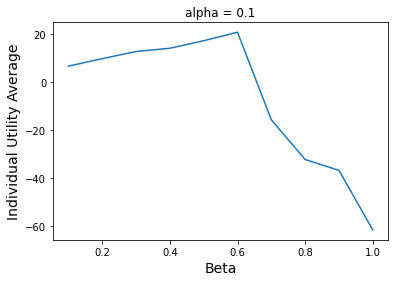

alpha= 0.2


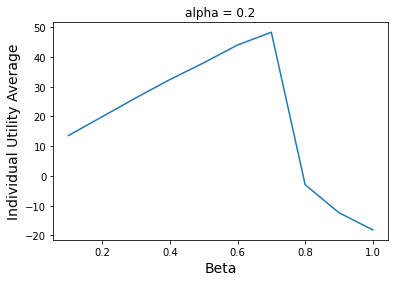

alpha= 0.3


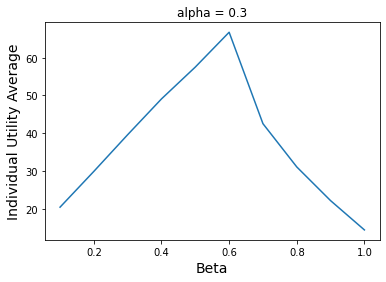

alpha= 0.4


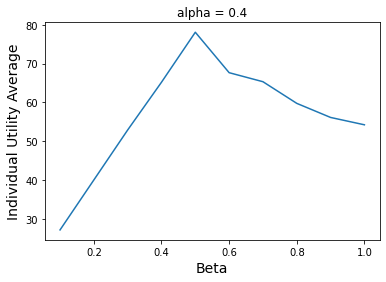

alpha= 0.5


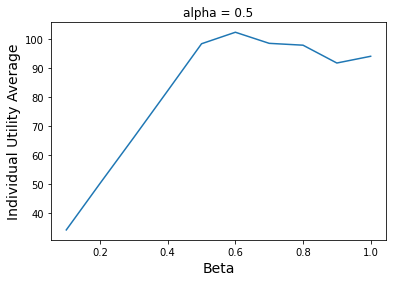

alpha= 0.6


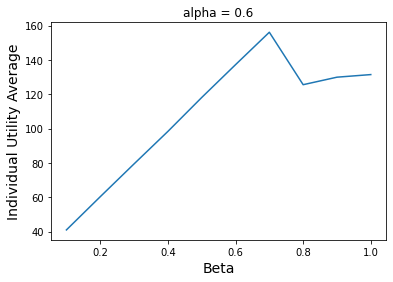

alpha= 0.7


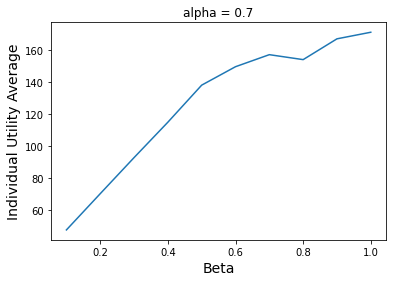

alpha= 0.8


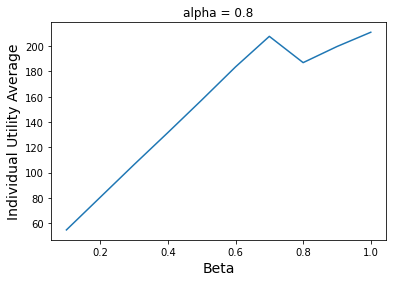

alpha= 0.9


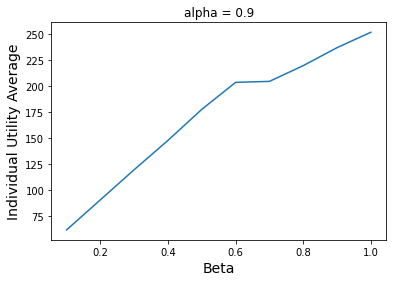

alpha= 1


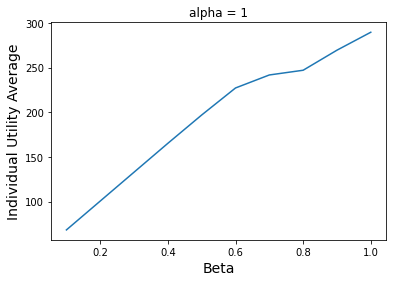

In [ ]:
result = []
for j in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  peace=[]
  for i in range(1,11):
    # print("p=",i/10,end=" ")#S_s,S_i,S_r,S_u,H_s,H_i
    p=utility_individual_avg(60, 1000, 0.01, 1000, 5, i/10,j,1-j, 360, 360,360,36, 180, 500)
    peace.append(p)
  print("alpha=",j)
  x = [i/10 for i in range(1,11)]
  result.append(peace)
  plt.plot(x, peace, linestyle='solid')
  plt.xlabel('Beta', fontsize = 14)
  plt.ylabel('Individual Utility Average', fontsize = 14)
  plt.title('alpha = '+str(j))
  # plt.legend()
  plt.savefig("best_pout_nod=60,nop=1000,perInf=0.01,gs=1000,pd=5,p_out=" + str(j/10) + ",r_to_s=0.7.png" ,dpi =300)
  plt.show()
  
# for i in range(1, 11):
#   x = [i for i in range(1,11)]
#   plt.plot(x, peace[i-1], linestyle='solid')
# plt.show()

In [ ]:
def utility_alpha_final(nod,nop,perInf,gs,pd,pout,alpha, beta, S_s,S_i,S_r,S_u,H_s,H_i):
    model = main_simuate_fn(nod,nop,perInf,gs,pd,pout)
    prevInf=0
    # alpha=[]
    inf=[]
    nop_Home=nop*(1-pout)
    U_g=0
    # curr_s,curr_i,curr_h,curr_r
    for ele in model:
        if prevInf==0:
          R=1#1st day R=1
          prevInf=ele[1]
          H_s=R*ele[1]
        else:
          R=(ele[1]-prevInf)/prevInf
          prevInf=ele[1]
          H_s=R*ele[1]
        # U_s=(alpha*S_s-(1-alpha)*H_s)*ele[0]
        # U_e=alpha*S_s*ele[1]
        # U_i=-(1-alpha)*H_i*ele[2]
        # U_r=alpha*S_r*ele[3]
        # Up_out=U_s+U_e+U_i+U_r
        # Up_in= alpha*S_u#alpha pout
        # U_p_day=(Up_out/nop)+(1-pout)*Up_in
        # U_p+=U_p_day
        U_g+=(pout*alpha*S_s*(ele[0]+ele[1]+ele[3])+(1-pout)*alpha*S_u*nop_Home-pout*(1-alpha)*(H_s*ele[0]+H_i*ele[1]))/(nop)
        # print(U_g)
    U_g_avg=U_g/nod
    return U_g_avg

pout= 0.1


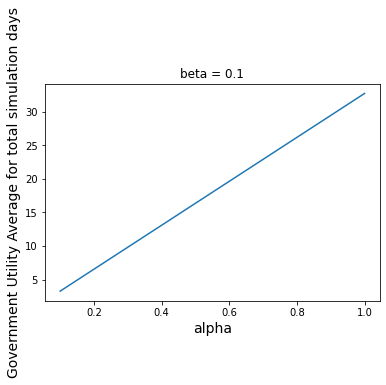

pout= 0.2


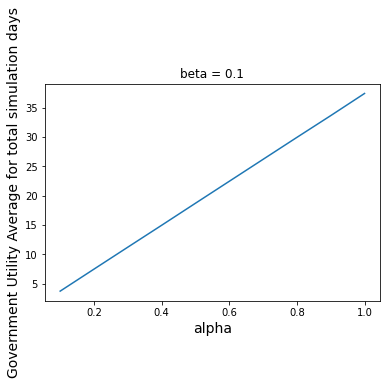

pout= 0.3


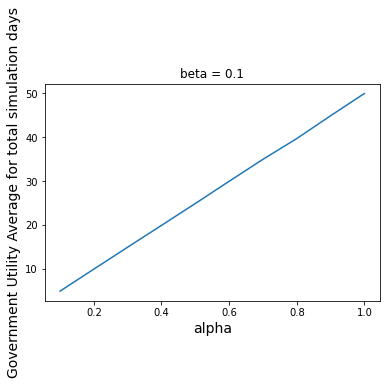

pout= 0.4


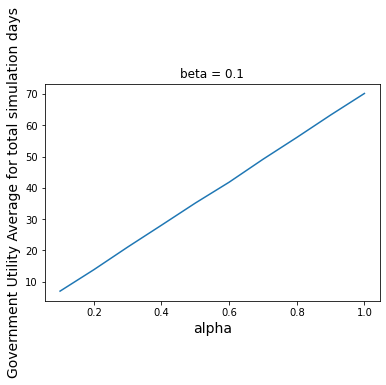

pout= 0.5


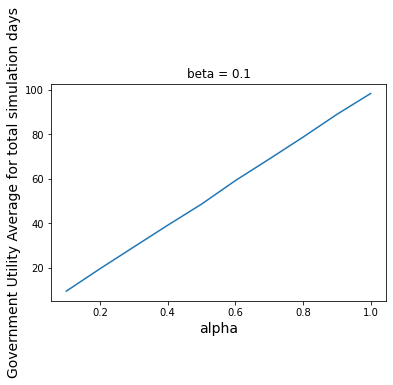

pout= 0.6


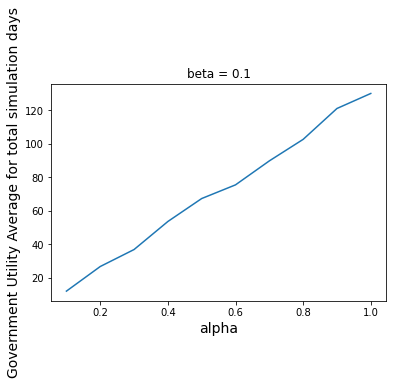

pout= 0.7


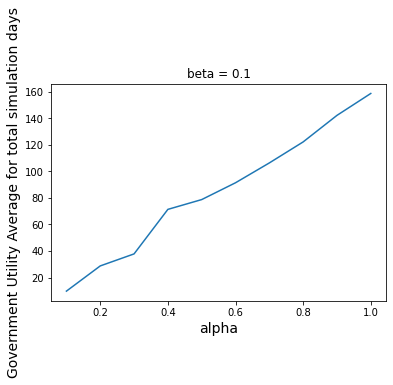

pout= 0.8


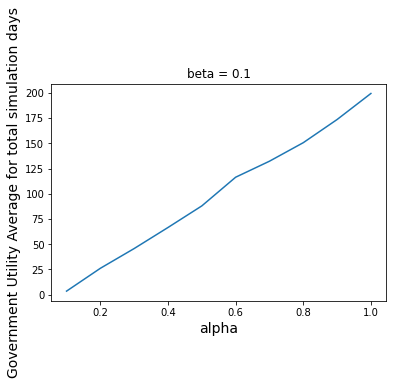

pout= 0.9


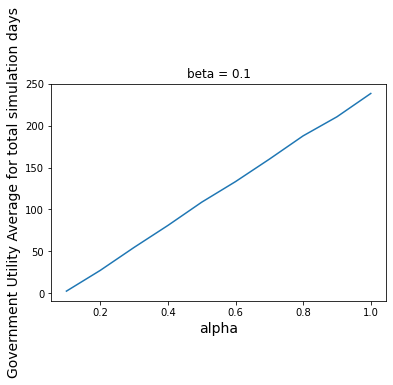

pout= 1


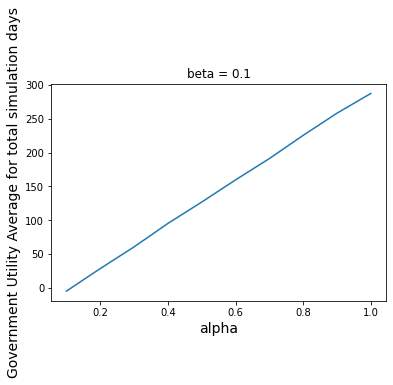

In [ ]:
#graph for alphas
result = []
for pout in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  alphas=[]
  for i in range(1,11):
    # print("p=",i/10,end=" ")#S_s,S_i,S_r,S_u,H_s,H_i
    alp=utility_alpha_final(60, 1000, 0.01, 1000, 5,pout,i/10,1-i/10, 360, 360,360,36, 180, 500)
    alphas.append(alp)
  print("pout=",pout)
  x = [i/10 for i in range(1,11)]
  result.append(alphas)
  plt.plot(x, alphas, linestyle='solid')
  plt.xlabel('alpha', fontsize = 14)
  plt.ylabel('Government Utility Average for total simulation days', fontsize = 14)
  plt.title('beta = '+str(j/10))
  plt.savefig("average_alpha_nod=60,nop=1000,perInf=0.01,gs=1000,pd=5,p_out=" + str(pout) + ",r_to_s=0.7.png" ,dpi =300)
  plt.show()
  